# Visualizzazione, tramite telemetria, dell'efficienza del DRS di RedBull

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
   
ff1.Cache.enable_cache('2023Baku') 
fp = ff1.get_session(2023, 'Baku', 'Q')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

In [138]:
ff1.plotting.setup_mpl()

lec_lap = fp.laps.pick_driver('LEC').pick_fastest()
ver_lap = fp.laps.pick_driver('VER').pick_fastest()

lec_tel = lec_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()

lec_tel_to_0 = lec_tel.loc[(lec_tel['Speed'].between(260, 360, inclusive=True)) & (lec_tel['Distance'].between(4500, 6000, inclusive=True))]
ver_tel_to_0 = ver_tel.loc[(ver_tel['Speed'].between(260, 360, inclusive=True)) & (ver_tel['Distance'].between(4500, 6000, inclusive=True))]

lec_tel_to_200 = lec_tel.loc[(lec_tel['Speed'].between(310, 360, inclusive=True)) & (lec_tel['Distance'].between(0, 200, inclusive=True))]
ver_tel_to_200 = ver_tel.loc[(ver_tel['Speed'].between(310, 360, inclusive=True)) & (ver_tel['Distance'].between(0, 200, inclusive=True))]

fer_color = ff1.plotting.team_color('FER')
rbr_color = ff1.plotting.team_color('RBR')

C:\Users\ricca\AppData\Local\Temp\ipykernel_10372\259681282.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  lec_tel_to_0 = lec_tel.loc[(lec_tel['Speed'].between(260, 360, inclusive=True)) & (lec_tel['Distance'].between(4500, 6000, inclusive=True))]
C:\Users\ricca\AppData\Local\Temp\ipykernel_10372\259681282.py:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  ver_tel_to_0 = ver_tel.loc[(ver_tel['Speed'].between(260, 360, inclusive=True)) & (ver_tel['Distance'].between(4500, 6000, inclusive=True))]
C:\Users\ricca\AppData\Local\Temp\ipykernel_10372\259681282.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  lec_tel_to_200 = lec_tel.loc[(lec_tel['Speed'].between(310, 360, inclusive=True)) & (lec_tel['Distance'].between(0, 200, inclusive=True))]
C:\Users\ricca\AppData\Local\Temp\ipykernel_10372\25

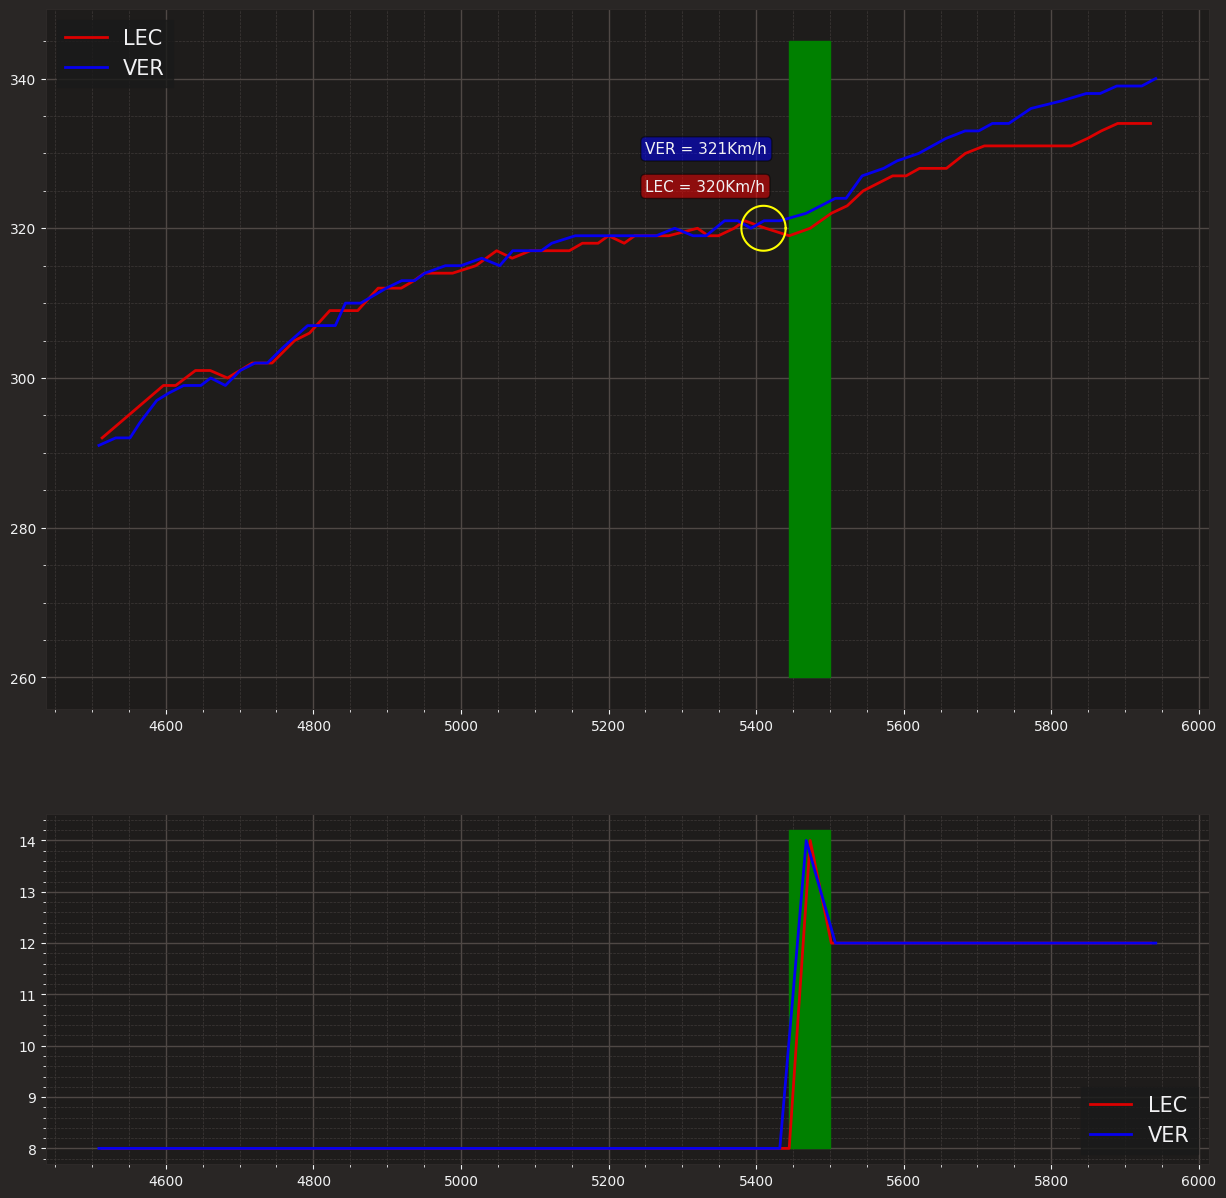

In [217]:
from matplotlib.patches import Rectangle
from math import pi

lec_tel_5k = lec_tel.query('Distance >= 5412.906944')['Speed'].iloc[0]
lec_tel_finish = lec_tel.query('Distance >= 5934')['Speed'].iloc[0]

ver_tel_5k = ver_tel.query('Distance >= 5412.906944')['Speed'].iloc[0]
ver_tel_finish = ver_tel.query('Distance >= 5941.576944')['Speed'].iloc[0]

plot_ratios = [2, 1]
fig, ax = plt.subplots(2, gridspec_kw={'height_ratios': plot_ratios})

fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].plot(lec_tel_to_0['Distance'], lec_tel_to_0['Speed'], color = fer_color, label = 'LEC', linewidth=2)

ax[0].plot(ver_tel_to_0['Distance'], ver_tel_to_0['Speed'], color = rbr_color, label = 'VER', linewidth=2)
ax[0].legend(prop={'size':15}, loc='upper left')
ax[0].add_patch(Rectangle((5445, 260), 55, 85, color='green'))
u=5410     #x-position of the center
v=320    #y-position of the center
a=30    #radius on the x-axis
b=3    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax[0].plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow")
ax[0].text(x=5250, y = 325, s = "LEC = " + str(lec_tel_5k) +"Km/h", fontsize=11, bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))
ax[0].text(x=5250, y = 330, s = "VER = " + str(ver_tel_5k) +"Km/h", fontsize=11, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.5))

u1=5410     #x-position of the center
v1=320    #y-position of the center
a1=30    #radius on the x-axis
b1=3    #radius on the y-axis
t1 = np.linspace(0, 2*pi, 100)
ax[0].plot( u1+a1*np.cos(t1) , v1+b1*np.sin(t1), color="yellow")


ax[1].add_patch(Rectangle((5445, 8), 55, 6.2, color='green'))
ax[1].plot(lec_tel_to_0['Distance'], lec_tel_to_0['DRS'], color = fer_color, label = 'LEC', linewidth=2)

ax[1].plot(ver_tel_to_0['Distance'], ver_tel_to_0['DRS'], color = rbr_color, label = 'VER', linewidth=2)
ax[1].legend(prop={'size':15}, loc='lower right')

# ax.add_patch(Rectangle((55, 80), 1, 52, color='red'))


In [195]:
ver_tel_finish = lec_tel.query('Distance >= 5934')['Speed'].iloc[0]
ver_tel_finish

334